# Word Embedding - Home Assigment
## Dr. Omri Allouche 2018. YData Deep Learning Course

[Open in Google Colab](https://colab.research.google.com/github/omriallouche/deep_learning_course/blob/master/DL_word_embedding_assignment.ipynb)
    
    
In this exercise, you'll use word vectors trained on a corpus of 380,000 lyrics of songs from MetroLyrics (https://www.kaggle.com/gyani95/380000-lyrics-from-metrolyrics).  
The dataset contains these fields for each song, in CSV format:
1. index
1. song
1. year
1. artist
1. genre
1. lyrics

Before doing this exercise, we recommend that you go over the "Bag of words meets bag of popcorn" tutorial (https://www.kaggle.com/c/word2vec-nlp-tutorial)

Other recommended resources:
- https://rare-technologies.com/word2vec-tutorial/
- https://www.kaggle.com/pierremegret/gensim-word2vec-tutorial

### Train word vectors
Train word vectors using the Skipgram Word2vec algorithm and the gensim package.
Make sure you perform the following:
- Tokenize words
- Lowercase all words
- Remove punctuation marks
- Remove rare words
- Remove stopwords

Use 300 as the dimension of the word vectors. Try different context sizes.

In [1]:
IS_COLAB = False
if IS_COLAB:
    BASE_DIR = '/content/drive/My Drive/Colab Notebooks/Y-data/DL/week3/'
else:
    BASE_DIR = ''

In [2]:
if IS_COLAB:
    from google.colab import drive
    drive.mount('/content/drive')

In [3]:
import pandas as pd
df = pd.read_csv(BASE_DIR + "lyrics.csv")
df

,index,song,year,artist,genre,lyrics
0,0,ego-remix,2009,beyonce-knowles,Pop,"Oh baby, how you doing?\nYou know I'm gonna cu..."
1,1,then-tell-me,2009,beyonce-knowles,Pop,"playin' everything so easy,\nit's like you see..."
2,2,honesty,2009,beyonce-knowles,Pop,If you search\nFor tenderness\nIt isn't hard t...
3,3,you-are-my-rock,2009,beyonce-knowles,Pop,"Oh oh oh I, oh oh oh I\n[Verse 1:]\nIf I wrote..."
4,4,black-culture,2009,beyonce-knowles,Pop,"Party the people, the people the party it's po..."
...,...,...,...,...,...,...
362232,362232,who-am-i-drinking-tonight,2012,edens-edge,Country,"I gotta say\nBoy, after only just a couple of ..."
362233,362233,liar,2012,edens-edge,Country,I helped you find her diamond ring\nYou made m...
362234,362234,last-supper,2012,edens-edge,Country,Look at the couple in the corner booth\nLooks ...
362235,362235,christ-alone-live-in-studio,2012,edens-edge,Country,When I fly off this mortal earth\nAnd I'm meas...


In [4]:
import nltk
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /home/ubuntu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/ubuntu/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [5]:
import re
from bs4 import BeautifulSoup             
from nltk.corpus import stopwords # Import the stop word list
from nltk.tokenize import sent_tokenize


def lyrics_to_words(raw_review, return_scentence=False):
    # Function to convert a raw review to a string of words
    # The input is a single string (a raw movie review), and 
    # the output is a single string (a preprocessed movie review)
    #
    # 1. Remove HTML
    review_text = BeautifulSoup(raw_review).get_text() 
    #
    # 2. Remove non-letters        
    letters_only = re.sub("[^a-zA-Z]", " ", review_text) 
    #
    # 3. Convert to lower case, split into individual words
    words = letters_only.lower().split()                             
    #
    # 4. In Python, searching a set is much faster than searching
    #   a list, so convert the stop words to a set
    stops = set(stopwords.words("english"))                  
    # 
    # 5. Remove stop words
    meaningful_words = [w for w in words if not w in stops]   
    # 6. Join the words back into one string separated by space, 
    # and return the result.
    scentence = ( " ".join( meaningful_words ))   
    if return_scentence:
        return scentence
    # 7. Tokenize scentence
    tokenized_scentence = sent_tokenize(scentence)
    if len(tokenized_scentence):
        return tokenized_scentence[0].split()
    else:
        # If the tockenizer return None than use the scentence w/o the tokenizer
        return scentence.split()

In [6]:
df.isna().sum() / df.shape[0]

index     0.000000
song      0.000006
year      0.000000
artist    0.000000
genre     0.000000
lyrics    0.264136
dtype: float64

In [7]:
# let's drop all the rows where the lyrics is nan, we have enough data to do so.
df.dropna(subset=['lyrics', 'song'], inplace=True)
df.reset_index(drop=True, inplace=True)
df.isna().sum()

index     0
song      0
year      0
artist    0
genre     0
lyrics    0
dtype: int64

In [8]:
from tqdm.notebook import tqdm
    
# Initialize an empty list to hold the clean lyrics
clean_train_lyrics_as_words = []

# Loop over each review; create an index i that goes from 0 to the length
# of the movie review list 
for row in tqdm(df.itertuples(index=False)):
    # Call our function for each one, and add the result to the list of
    # clean lyrics
    clean_train_lyrics_as_words.append(lyrics_to_words(row.lyrics))

/home/ubuntu/venvs/dl_venv/lib/python3.6/site-packages/bs4/__init__.py:312: UserWarning: ".." looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  ' Beautiful Soup.' % self._decode_markup(markup)
/home/ubuntu/venvs/dl_venv/lib/python3.6/site-packages/bs4/__init__.py:312: UserWarning: "." looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  ' Beautiful Soup.' % self._decode_markup(markup)


In [153]:
ALREADY_TRAINED_WV = True

In [11]:
from gensim.models.word2vec import Word2Vec

if not ALREADY_TRAINED_WV:
    # Set values for various parameters
    num_features = 300    # Word vector dimensionality                      
    min_word_count = 40   # Minimum word count, words that have less than 10 occurances will not be presented
    num_workers = 4       # Number of threads to run in parallel
    context = 10          # Context window size                                                                                    
    downsampling = 1e-3   # Downsample setting for frequent words

    model = Word2Vec(clean_train_lyrics_as_words, min_count=min_word_count, size=num_features, workers=num_workers, 
                    sg=1, sample=downsampling, window=context);

unable to import 'smart_open.gcs', disabling that module


In [13]:
model_name = BASE_DIR + "300features_40minwords_10context"
if not ALREADY_TRAINED_WV:
    # If you don't plan to train the model any further, calling 
    # init_sims will make the model much more memory-efficient.
    model.init_sims(replace=True)

    # save the model for later use. You can load it later using Word2Vec.load()
    model.save(model_name)

In [12]:
if ALREADY_TRAINED_WV:
    model = Word2Vec.load(model_name)

In [13]:
word_vectors = model.wv
len(word_vectors.vocab)

29619

### Review most similar words
Get initial evaluation of the word vectors by analyzing the most similar words for a few interesting words in the text. 

Choose words yourself, and find the most similar words to them.

In [16]:
result = word_vectors.most_similar(['boy'])
result

[('girl', 0.5749273300170898),
 ('boys', 0.5245912075042725),
 ('guy', 0.4394528865814209),
 ('knuck', 0.42591819167137146),
 ('girls', 0.4128696620464325),
 ('rude', 0.41113653779029846),
 ('superfreak', 0.4023716449737549),
 ('whoz', 0.399929404258728),
 ('coy', 0.39534834027290344),
 ('know', 0.39445552229881287)]

### Word Vectors Algebra
We've seen in class examples of algebraic games on the word vectors (e.g. man - woman + king = queen ). 

Try a few vector algebra terms, and evaluate how well they work. Try to use the Cosine distance and compare it to the Euclidean distance.

In [17]:
result = word_vectors.most_similar(positive=['woman', 'boy'], negative=['man'])
print("{}: {:.4f}".format(*result[0]))

girl: 0.4944


## Sentiment Analysis
Estimate sentiment of words using word vectors.  
In this section, we'll use the SemEval-2015 English Twitter Sentiment Lexicon.  
The lexicon was used as an official test set in the SemEval-2015 shared Task #10: Subtask E, and contains a polarity score for words in range -1 (negative) to 1 (positive) - http://saifmohammad.com/WebPages/SCL.html#OPP

Build a classifier for the sentiment of a word given its word vector. Split the data to a train and test sets, and report the model performance on both sets.

In [18]:
# Data preperation

In [63]:
sentiment_df = pd.read_table(BASE_DIR + "SemEval2015-English-Twitter-Lexicon/SemEval2015-English-Twitter-Lexicon.txt",
                            names=['score', 'word'], header=None)
sentiment_df

,score,word
0,0.984,loves
1,0.984,#inspirational
2,0.969,amazing
3,0.969,#peaceful
4,0.953,#greatness
...,...,...
1510,-0.969,abuse
1511,-0.969,#failure
1512,-0.982,kill
1513,-0.984,bitches


In [25]:
# build a list of the terms, integer indices,
# and term counts from the food2vec model vocabulary
ordered_vocab = [(term, voc.index, voc.count) for term, voc in model.wv.vocab.items()]
print(ordered_vocab)
# sort by the term counts, so the most common terms appear first
ordered_vocab = sorted(ordered_vocab, key=lambda k: -k[2])

# unzip the terms, integer indices, and counts into separate lists
ordered_terms, term_indices, term_counts = zip(*ordered_vocab)
# create a DataFrame with the vectors as data,
# and the terms as row labels
word_vectors = pd.DataFrame(model.wv.syn0norm[term_indices, :], index=ordered_terms)

for word in word_vectors.index:
    try:
        word_vectors.loc[word, 'score'] = sentiment_df[sentiment_df['word']==word].score.item()
    except Exception:
        import numpy as np
        word_vectors.loc[word, 'score'] = np.nan    

[('oh', 3, 238334), ('baby', 13, 151103), ('know', 2, 313977), ('gonna', 27, 103516), ('cut', 436, 11986), ('right', 26, 105861), ('chase', 1225, 3662), ('women', 826, 5905), ('made', 94, 43754), ('like', 1, 314673), ('think', 41, 80809), ('created', 2422, 1586), ('special', 847, 5768), ('purpose', 2621, 1412), ('feel', 24, 110446), ('let', 11, 171515), ('get', 5, 221639), ('lost', 121, 36982), ('need', 28, 100097), ('call', 88, 45374), ('work', 236, 22115), ('cause', 17, 141925), ('boss', 1304, 3378), ('real', 116, 38335), ('want', 12, 158412), ('show', 106, 40438), ('consider', 3643, 889), ('lucky', 944, 5035), ('big', 134, 33106), ('deal', 832, 5859), ('well', 52, 70168), ('got', 4, 225962), ('key', 917, 5194), ('heart', 29, 100063), ('rather', 706, 7159), ('open', 229, 22973), ('body', 208, 24636), ('secrets', 1341, 3265), ('inside', 100, 42718), ('lie', 263, 20683), ('wide', 673, 7498), ('strong', 331, 16355), ('fit', 996, 4759), ('much', 79, 47686), ('tough', 1124, 4091), ('talk'

/home/ubuntu/venvs/dl_venv/lib/python3.6/site-packages/ipykernel_launcher.py:12: DeprecationWarning: Call to deprecated `syn0norm` (Attribute will be removed in 4.0.0, use self.vectors_norm instead).
  if sys.path[0] == '':


In [27]:
words_df = word_vectors.dropna()
words_df

,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,score
love,0.023003,-0.078437,0.009077,0.026538,0.051919,-0.070256,-0.048808,-0.049692,-0.014933,0.017357,...,-0.029463,-0.128817,-0.007854,0.072889,-0.075964,-0.109260,-0.036839,-0.086941,-0.044396,0.875
know,0.052670,-0.069941,0.004851,0.001855,0.052044,-0.069646,-0.057748,0.079520,0.051007,0.067624,...,0.021483,-0.030999,-0.046659,0.098443,-0.155194,0.010518,-0.041766,-0.096570,-0.070121,0.000
oh,0.042658,0.050038,-0.187136,0.048771,0.114302,-0.023721,0.005536,-0.013205,0.029909,0.096618,...,0.013543,-0.078689,-0.045085,0.046073,-0.017058,-0.052299,0.019942,-0.009689,0.035810,0.172
got,0.028476,-0.093738,0.032991,0.130257,0.024300,-0.055510,-0.030413,0.106160,-0.019622,0.104742,...,-0.040845,-0.005805,-0.049882,0.016324,-0.126803,-0.060457,-0.099327,-0.006598,-0.000548,0.391
get,0.080377,-0.042679,-0.059151,0.025541,0.106373,-0.032012,0.030967,0.070284,0.040405,0.059330,...,0.052251,-0.067657,0.051736,-0.028367,-0.008917,-0.074370,-0.043578,-0.016509,-0.031901,0.453
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
malfunction,0.006729,-0.050200,0.012043,0.032161,0.131965,0.009297,0.028837,0.028024,0.013533,0.105270,...,0.015425,0.044786,0.047138,0.056629,-0.066662,-0.004677,0.044175,-0.029803,-0.109518,-0.531
recommended,0.054843,-0.100658,0.019659,0.053478,0.135875,0.012867,0.054301,0.042060,0.128522,0.068315,...,0.107402,0.097872,-0.052332,0.014374,-0.070730,-0.029659,0.064483,-0.163017,0.061074,0.484
unselfish,0.011962,-0.059782,0.028978,0.015194,0.063573,-0.064484,0.007212,-0.081178,0.053352,0.094509,...,-0.021727,-0.017840,-0.089732,0.026324,-0.081614,-0.001872,-0.043416,-0.144280,0.065987,0.359
sacked,0.020918,-0.043529,0.025988,-0.011841,0.099864,-0.001044,-0.018828,0.039819,0.031980,0.046679,...,0.003524,0.103085,0.054535,0.001327,-0.098477,-0.013397,-0.047001,-0.101270,0.050753,-0.391


In [28]:
from sklearn.model_selection import train_test_split
y = words_df.pop('score')
X = words_df

In [29]:
# Lets train our regressor
from catboost import CatBoostRegressor, Pool
from sklearn.model_selection import GridSearchCV

clf = CatBoostRegressor(iterations=20,
                           depth=2,
                           learning_rate=1,
                           loss_function='RMSE',
                           verbose=False)

# Lets optimize some hyperparams
params = {'iterations':[10,20],
          'depth':[2, 3, 4],
          'learning_rate': np.linspace(0.75, 1, 3)}

cb_cv = GridSearchCV(clf, param_grid=params, cv=5, scoring='neg_root_mean_squared_error')

#train the model
cb_cv.fit(X, y)

GridSearchCV(cv=5, error_score=nan,
             estimator=<catboost.core.CatBoostRegressor object at 0x7f6b05ea7940>,
             iid='deprecated', n_jobs=None,
             param_grid={'depth': [2, 3, 4], 'iterations': [10, 20],
                         'learning_rate': array([0.75 , 0.875, 1.   ])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_root_mean_squared_error', verbose=0)

In [30]:
print(cb_cv.best_params_)
print(cb_cv.best_score_)

{'depth': 2, 'iterations': 20, 'learning_rate': 0.75}
-0.4181228369967477


In [31]:
test_words = set(word_vectors.index) - set(X.index)
X_test = word_vectors.loc[test_words,].drop(columns=['score'])
X_test['predicted_score'] = cb_cv.best_estimator_.predict(X_test)

Use your trained model from the previous question to predict the sentiment score of words in the lyrics corpus that are not part of the original sentiment dataset. Review the words with the highest positive and negative sentiment. Do the results make sense?

In [32]:
X_test.sort_values(by=['predicted_score'], inplace=True)
display(X_test.head(10))
display(X_test.tail(10))

,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,predicted_score
deliverance,-0.029535,-0.022858,-0.023676,-0.054503,-0.007638,0.010924,-0.078600,-0.026764,0.053380,0.139579,...,-0.090118,0.056008,-0.068550,0.089158,-0.020028,0.048256,0.054563,-0.057625,-0.020976,-1.254298
salvage,-0.107977,-0.075289,-0.004406,0.085289,0.029504,0.096187,0.024928,0.012502,0.004496,-0.004942,...,-0.053613,0.056904,0.045775,-0.067188,0.053284,-0.027470,-0.095749,-0.065810,-0.012468,-1.223446
wallowing,-0.015139,-0.045643,-0.093255,0.039323,-0.027957,-0.049262,-0.064757,0.036188,0.047577,0.030463,...,-0.025744,0.038759,0.039387,0.044668,-0.101673,0.036676,0.043241,-0.060929,-0.077646,-1.127979
severely,-0.045878,-0.023986,0.048584,0.082027,0.054307,-0.116848,-0.037064,0.055440,0.016161,0.029695,...,0.027492,0.057267,-0.003065,0.050760,-0.146699,-0.044536,-0.086646,0.042802,-0.039958,-1.123131
excruciating,0.002811,-0.050333,-0.042573,-0.024275,-0.032671,-0.031833,-0.096425,0.042505,-0.063546,0.062983,...,-0.047784,0.048719,-0.086882,0.068732,-0.067060,0.017580,-0.011402,0.021655,-0.058554,-1.118766
rapes,0.041279,-0.065246,0.014929,0.000656,0.107964,-0.063008,-0.081396,0.020646,-0.010789,0.048755,...,0.032897,-0.001110,-0.033594,0.105435,-0.107573,-0.026116,-0.020388,-0.083294,0.023910,-1.112992
cunts,-0.029491,-0.008837,0.015008,-0.010158,0.063707,-0.079638,-0.035290,0.067480,-0.035062,0.076649,...,0.020632,0.004550,0.028911,0.097804,-0.076627,-0.030282,0.020891,-0.018084,0.013877,-1.109930
choking,-0.016460,-0.007134,-0.050435,-0.086639,-0.020517,-0.137330,-0.038342,0.057669,0.088106,0.060811,...,0.052998,0.057874,0.085836,-0.044587,-0.020956,0.046719,-0.011743,-0.081222,-0.058124,-1.073649
tortured,-0.015856,-0.005880,-0.030769,-0.007804,-0.033726,-0.095413,-0.088115,-0.019260,-0.047339,0.066205,...,0.063041,-0.082076,-0.058526,-0.049700,-0.088268,0.082279,0.029472,-0.014345,0.044996,-1.068708
spineless,0.038651,-0.081070,-0.027736,-0.012693,-0.011760,-0.029184,-0.055703,0.050468,-0.022624,0.093544,...,0.008214,0.008157,-0.053016,-0.059135,0.070509,-0.014905,-0.007297,-0.063221,0.028888,-1.047091


,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,predicted_score
rou,0.037291,-0.016262,-0.033161,-0.025781,0.066815,-0.003722,0.012403,-0.012986,0.072771,0.096304,...,0.007099,0.005173,-0.084115,0.110734,0.040865,-0.078241,0.002335,-0.048476,0.038061,0.977154
kahi,0.060395,-0.053646,-0.024796,-0.032665,0.124537,0.028352,-0.020717,0.038145,0.012432,0.001989,...,0.038714,-0.044261,-0.054251,0.061063,-0.028079,-0.062703,-0.034611,0.021225,0.108745,0.997673
tiss,0.126457,0.003659,-0.044926,0.047945,0.156272,-0.039613,-0.099355,0.077057,-0.049442,0.003546,...,-0.026347,-0.051615,-0.096332,0.072782,-0.016304,-0.142397,-0.137523,0.005520,0.046296,1.010799
haystack,0.021921,0.025848,-0.109035,0.184689,0.095370,0.064480,-0.005545,0.039101,-0.101763,0.055017,...,0.027313,0.001692,0.019889,0.014685,-0.141490,0.039601,-0.087087,-0.034171,-0.074444,1.021155
awhile,-0.175103,0.014784,-0.018950,0.194062,0.049177,0.024441,0.052353,0.025080,0.029042,-0.034183,...,0.059195,-0.023262,-0.056852,0.028436,0.026870,0.051207,0.033288,-0.098499,0.010176,1.029813
barbara,-0.096153,-0.030889,-0.043879,0.020423,-0.006493,-0.004320,0.036400,-0.105207,-0.006073,-0.025331,...,0.030431,-0.108703,-0.099337,0.030868,0.035772,0.003196,0.040221,-0.033970,0.008663,1.078516
danser,0.022425,-0.036932,-0.027760,-0.023931,0.044324,0.087948,-0.009487,0.064821,0.040177,-0.045150,...,-0.050353,-0.048300,-0.059425,0.020760,-0.038157,-0.037801,-0.037472,-0.139186,0.093034,1.083876
refreshing,0.026910,-0.013139,0.017568,-0.042777,0.025505,0.025055,-0.001660,0.018308,-0.052491,0.099191,...,0.024742,0.028482,-0.002262,0.059103,-0.097518,-0.023305,0.046068,-0.127736,0.031946,1.102443
cuties,-0.069543,-0.040403,0.065184,-0.014890,0.094993,-0.004914,0.057515,0.079334,0.022774,0.060039,...,0.047851,-0.003263,-0.079537,0.008408,-0.058262,-0.030103,0.036436,-0.072481,0.091121,1.119906
capri,-0.111278,0.001089,-0.020143,0.113829,-0.014903,-0.000455,0.085068,-0.017801,0.084040,0.055474,...,-0.045275,-0.001763,-0.044212,-0.001412,-0.021663,-0.021943,-0.045796,-0.069876,-0.057568,1.154963


##### Yes, most of them make scence.
##### We can see in the negative words, words like rapes, choking, spineless
##### and in the positive words, words like danser, cuties, refreshing

### Visualize Word Vectors
In this section, you'll plot words on a 2D grid based on their inner similarity. We'll use the tSNE transformation to reduce dimensions from 300 to 2. You can get sample code from https://www.kaggle.com/pierremegret/gensim-word2vec-tutorial or other tutorials online.

Perform the following:
- Keep only the 3,000 most frequent words (after removing stopwords)
- For this list, compute for each word its relative abundance in each of the genres
- Compute the ratio between the proportion of each word in each genre and the proportion of the word in the entire corpus (the background distribution)
- Pick the top 50 words for each genre. These words give good indication for that genre. Join the words from all genres into a single list of top significant words. 
- Compute tSNE transformation to 2D for all words, based on their word vectors
- Plot the list of the top significant words in 2D. Next to each word output its text. The color of each point should indicate the genre for which it is most significant.

You might prefer to use a different number of points or a slightly different methodology for improved results.  
Analyze the results.

In [28]:
from tqdm.notebook import tqdm
    
# Initialize an empty list to hold the clean lyrics
clean_train_lyrics_as_scentences = []

for row in tqdm(df.itertuples(index=False)):
    # Call our function for each one, and add the result to the list of
    # clean lyrics
    clean_train_lyrics_as_scentences.append(lyrics_to_words( row.lyrics, return_scentence=True))

/home/ubuntu/venvs/dl_venv/lib/python3.6/site-packages/bs4/__init__.py:312: UserWarning: ".." looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  ' Beautiful Soup.' % self._decode_markup(markup)
/home/ubuntu/venvs/dl_venv/lib/python3.6/site-packages/bs4/__init__.py:312: UserWarning: "." looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  ' Beautiful Soup.' % self._decode_markup(markup)


In [29]:
from sklearn.feature_extraction.text import CountVectorizer
words_num = 3000
vectorizer = CountVectorizer(analyzer = "word",   \
                             tokenizer = None,    \
                             preprocessor = None, \
                             stop_words = None,   \
                             max_features = words_num) 

train_data_features = vectorizer.fit_transform(clean_train_lyrics_as_scentences)
train_data_features

<266556x3000 sparse matrix of type '<class 'numpy.int64'>'
	with 13133746 stored elements in Compressed Sparse Row format>

In [30]:
# List of all features(the words)
vocab = vectorizer.get_feature_names()
bow_df = pd.DataFrame(train_data_features.todense(), columns=vocab)

# Sparse representation for each song
bow_df['genre'] = df.genre
bow_df

,aah,aber,able,accept,aching,across,act,actin,acting,action,...,youre,youth,youve,yuh,zeit,zero,zone,zu,zum,genre
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Pop
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Pop
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Pop
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Pop
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Pop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266551,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Country
266552,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Country
266553,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Country
266554,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Country


In [109]:
from collections import Counter

gener_words_counting_dict = {}
gb_genere_df = df.groupby(['genre'])
for name, genere in gb_genere_df:
    c = Counter()
    for row in genere.itertuples():
        c.update(lyrics_to_words(row.lyrics))
    gener_words_counting_dict[name] = c.copy()

/home/ubuntu/venvs/dl_venv/lib/python3.6/site-packages/bs4/__init__.py:312: UserWarning: "." looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  ' Beautiful Soup.' % self._decode_markup(markup)
/home/ubuntu/venvs/dl_venv/lib/python3.6/site-packages/bs4/__init__.py:312: UserWarning: ".." looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  ' Beautiful Soup.' % self._decode_markup(markup)


In [110]:
genere_words_freq_df = pd.DataFrame(np.zeros(shape=(len(gb_genere_df),
                                                    len(vocab))),
                                    columns=vocab, 
                                    index=gener_words_counting_dict.keys())

for genere, counter in  gener_words_counting_dict.items():
    for word, count in counter.items():
        if word in vocab:
            genere_words_freq_df.loc[genere, word] = count

In [111]:
genere_words_freq_df

,aah,aber,able,accept,aching,across,act,actin,acting,action,...,younger,youre,youth,youve,yuh,zeit,zero,zone,zu,zum
Country,30.0,0.0,91.0,37.0,92.0,704.0,234.0,51.0,77.0,28.0,...,74.0,114.0,61.0,32.0,0.0,0.0,23.0,33.0,8.0,0.0
Electronic,38.0,16.0,86.0,52.0,35.0,157.0,182.0,6.0,66.0,108.0,...,30.0,228.0,161.0,21.0,890.0,86.0,56.0,60.0,177.0,36.0
Folk,3.0,1.0,13.0,2.0,17.0,124.0,21.0,0.0,11.0,4.0,...,16.0,80.0,22.0,19.0,0.0,4.0,14.0,6.0,3.0,0.0
Hip-Hop,526.0,618.0,462.0,263.0,45.0,1079.0,3136.0,1228.0,994.0,835.0,...,160.0,545.0,449.0,57.0,2745.0,350.0,414.0,1222.0,2218.0,376.0
Indie,30.0,3.0,22.0,16.0,48.0,152.0,48.0,2.0,17.0,8.0,...,27.0,46.0,47.0,30.0,4.0,1.0,5.0,5.0,18.0,0.0
Jazz,26.0,4.0,40.0,19.0,36.0,246.0,86.0,10.0,64.0,34.0,...,23.0,85.0,69.0,6.0,21.0,11.0,15.0,12.0,59.0,12.0
Metal,19.0,33.0,228.0,257.0,86.0,917.0,481.0,21.0,99.0,199.0,...,41.0,130.0,311.0,53.0,21.0,200.0,166.0,152.0,590.0,146.0
Not Available,136.0,181.0,225.0,139.0,97.0,606.0,506.0,83.0,166.0,158.0,...,65.0,1041.0,136.0,306.0,67.0,339.0,139.0,155.0,1106.0,279.0
Other,3.0,6.0,25.0,28.0,26.0,126.0,103.0,16.0,48.0,34.0,...,31.0,22.0,54.0,5.0,142.0,5.0,7.0,50.0,36.0,4.0
Pop,399.0,112.0,250.0,206.0,226.0,1160.0,986.0,321.0,480.0,285.0,...,170.0,952.0,226.0,169.0,87.0,150.0,184.0,323.0,828.0,148.0


In [112]:
genere_words_freq_df = genere_words_freq_df/genere_words_freq_df.sum(axis=0)
genere_words_freq_df

,aah,aber,able,accept,aching,across,act,actin,acting,action,...,younger,youre,youth,youve,yuh,zeit,zero,zone,zu,zum
Country,0.018040,0.000000,0.042169,0.021338,0.072727,0.073849,0.029445,0.027157,0.028082,0.010290,...,0.060310,0.022248,0.021879,0.027073,0.000000,0.000000,0.013781,0.012891,0.001131,0.000000
Electronic,0.022850,0.013115,0.039852,0.029988,0.027668,0.016469,0.022902,0.003195,0.024070,0.039691,...,0.024450,0.044496,0.057747,0.017766,0.221063,0.053284,0.033553,0.023438,0.025018,0.026987
Folk,0.001804,0.000820,0.006024,0.001153,0.013439,0.013007,0.002643,0.000000,0.004012,0.001470,...,0.013040,0.015613,0.007891,0.016074,0.000000,0.002478,0.008388,0.002344,0.000424,0.000000
Hip-Hop,0.316296,0.506557,0.214087,0.151672,0.035573,0.113186,0.394614,0.653887,0.362509,0.306872,...,0.130399,0.106362,0.161047,0.048223,0.681818,0.216853,0.248053,0.477344,0.313498,0.281859
Indie,0.018040,0.002459,0.010195,0.009227,0.037945,0.015945,0.006040,0.001065,0.006200,0.002940,...,0.022005,0.008977,0.016858,0.025381,0.000994,0.000620,0.002996,0.001953,0.002544,0.000000
Jazz,0.015634,0.003279,0.018536,0.010957,0.028458,0.025805,0.010822,0.005325,0.023341,0.012495,...,0.018745,0.016589,0.024749,0.005076,0.005216,0.006815,0.008987,0.004687,0.008339,0.008996
Metal,0.011425,0.027049,0.105653,0.148212,0.067984,0.096192,0.060526,0.011182,0.036105,0.073135,...,0.033415,0.025371,0.111549,0.044839,0.005216,0.123916,0.099461,0.059375,0.083392,0.109445
Not Available,0.081780,0.148361,0.104263,0.080161,0.076680,0.063569,0.063672,0.044196,0.060540,0.058067,...,0.052975,0.203162,0.048780,0.258883,0.016642,0.210037,0.083283,0.060547,0.156325,0.209145
Other,0.001804,0.004918,0.011585,0.016148,0.020553,0.013217,0.012961,0.008520,0.017505,0.012495,...,0.025265,0.004294,0.019369,0.004230,0.035271,0.003098,0.004194,0.019531,0.005088,0.002999
Pop,0.239928,0.091803,0.115848,0.118800,0.178656,0.121683,0.124072,0.170927,0.175055,0.104741,...,0.138549,0.185792,0.081062,0.142978,0.021610,0.092937,0.110246,0.126172,0.117032,0.110945


In [113]:
num_of_words_to_visualize = 50
top_freq_words_list = []
for genere, row in genere_words_freq_df.iterrows():
    for word_index in list(row.argsort()[-num_of_words_to_visualize:][::-1]):
        top_freq_words_list.append(vocab[word_index])

/home/ubuntu/venvs/dl_venv/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # This is added back by InteractiveShellApp.init_path()


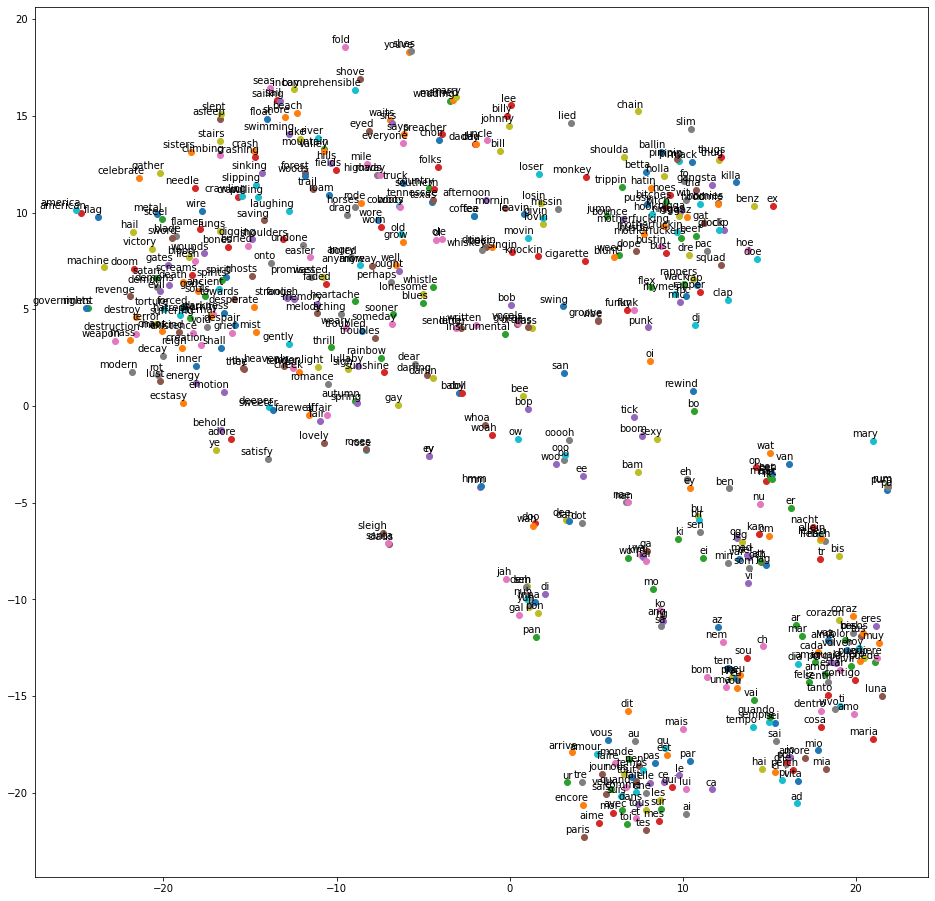

In [114]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

def tsne_plot(model, words_list):
    "Creates a TSNE model and plots it"
    labels = []
    tokens = []

    for word in model.wv.vocab:
        if word in words_list:
            tokens.append(model[word])
            labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()
tsne_plot(model, top_freq_words_list)

## Text Classification
In this section, you'll build a text classifier, determining the genre of a song based on its lyrics.

### Text classification using Bag-of-Words
Build a Naive Bayes classifier based on the bag of Words.  
You will need to divide your dataset into a train and test sets.

In [31]:
y = bow_df.pop('genre')

In [69]:
np.unique(list(y.values))

array(['Country', 'Electronic', 'Folk', 'Hip-Hop', 'Indie', 'Jazz',
       'Metal', 'Not Available', 'Other', 'Pop', 'R&B', 'Rock'],
      dtype='<U13')

In [70]:
y.replace(to_replace='R&B', value='RB', inplace=True)
y.replace(to_replace='Hip-Hop', value='HipHop', inplace=True)
y = y.astype(dtype=np.str)

Let's train the CountVectorizer with all of the vocab

In [118]:
from sklearn.feature_extraction.text import CountVectorizer
words_num = len(model.wv.vocab)
vectorizer = CountVectorizer(analyzer = "word",   \
                             tokenizer = None,    \
                             preprocessor = None, \
                             stop_words = None,   \
                             max_features = words_num) 

train_data_features = vectorizer.fit_transform(clean_train_lyrics_as_scentences)
train_data_features

<266556x29619 sparse matrix of type '<class 'numpy.int64'>'
	with 16574272 stored elements in Compressed Sparse Row format>

In [32]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
encoded_y = le.fit_transform(y)
encoded_y

array([9, 9, 9, ..., 0, 0, 0])

In [120]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import make_pipeline
import numpy as np


X_train, X_test, y_train, y_test = train_test_split(train_data_features, encoded_y, 
                                                    test_size=0.2,
                                                    random_state=13)


clf = MultinomialNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.39563325330132054

Show the confusion matrix.

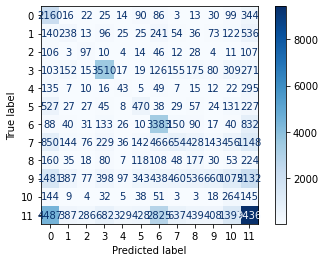

In [121]:
from sklearn.metrics import multilabel_confusion_matrix 
from sklearn.metrics import plot_confusion_matrix

disp = plot_confusion_matrix(clf, X_test, y_test, cmap='Blues', values_format='d')

Show the classification report - precision, recall, f1 for each class.

In [122]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.21      0.74      0.33      2902
           1       0.16      0.15      0.16      1599
           2       0.14      0.22      0.17       442
           3       0.67      0.71      0.69      4932
           4       0.07      0.07      0.07       616
           5       0.28      0.29      0.28      1610
           6       0.43      0.70      0.53      4840
           7       0.30      0.14      0.19      4772
           8       0.09      0.17      0.12      1058
           9       0.44      0.08      0.14      8084
          10       0.07      0.37      0.11       716
          11       0.60      0.43      0.50     21741

    accuracy                           0.40     53312
   macro avg       0.29      0.34      0.27     53312
weighted avg       0.47      0.40      0.39     53312



### Text classification using Word Vectors
#### Average word vectors
Do the same, using a classifier that averages the word vectors of words in the document.

In [123]:
from tqdm.notebook import tqdm
import numpy as np

vector_size = 300
wv = model.wv
    
# Initialize an empty list to hold the clean lyrics
clean_train_lyrics = []
average_wv_matrix = np.zeros(shape=(df.shape[0], vector_size+1))
average_wv = np.zeros(shape=(1,vector_size))
# Loop over each review; create an index i that goes from 0 to the length
# of the movie review list
for i, (label, cleaned_row) in enumerate(zip(encoded_y, clean_train_lyrics_as_words)):
    # Call our function for each one, and add the result to the list of
    # clean lyrics
    words_count = 0
    average_wv = 0

    for word in cleaned_row:
        try:
            average_wv += wv[word]
            words_count += 1
        except:
            pass
    try:
        average_wv /= words_count
    except ZeroDivisionError:
        average_wv = 0
    average_wv_matrix[i, range(vector_size)] = average_wv
    average_wv_matrix[i, vector_size] =  label


In [124]:
average_wv_matrix.shape

(266556, 301)

In [125]:
y = average_wv_matrix[:,vector_size]
X = average_wv_matrix[:,:vector_size]
X.shape, y.shape

((266556, 300), (266556,))

In [126]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2,
                                                    random_state=13)

In [127]:
# Lets train our classifier
from catboost import CatBoostClassifier

clf = CatBoostClassifier(iterations=100,
                         loss_function='MultiClass',
                         verbose=True)

#train the model
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

Learning rate set to 0.5
0:	learn: 1.8069100	total: 908ms	remaining: 1m 29s
1:	learn: 1.7147018	total: 1.96s	remaining: 1m 36s
2:	learn: 1.6704875	total: 2.97s	remaining: 1m 36s
3:	learn: 1.6410556	total: 3.94s	remaining: 1m 34s
4:	learn: 1.6209525	total: 5.01s	remaining: 1m 35s
5:	learn: 1.6031121	total: 6.07s	remaining: 1m 35s
6:	learn: 1.5863200	total: 7.03s	remaining: 1m 33s
7:	learn: 1.5761333	total: 8.03s	remaining: 1m 32s
8:	learn: 1.5658660	total: 9.08s	remaining: 1m 31s
9:	learn: 1.5576409	total: 10.1s	remaining: 1m 30s
10:	learn: 1.5513793	total: 11.1s	remaining: 1m 29s
11:	learn: 1.5431440	total: 12.1s	remaining: 1m 28s
12:	learn: 1.5357689	total: 13.1s	remaining: 1m 27s
13:	learn: 1.5284706	total: 14.1s	remaining: 1m 26s
14:	learn: 1.5224295	total: 15.1s	remaining: 1m 25s
15:	learn: 1.5160874	total: 16.2s	remaining: 1m 24s
16:	learn: 1.5123490	total: 17.2s	remaining: 1m 23s
17:	learn: 1.5081737	total: 18.1s	remaining: 1m 22s
18:	learn: 1.5042357	total: 19s	remaining: 1m 21s

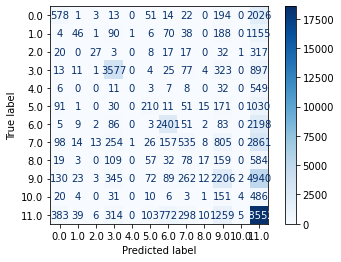

In [128]:
from sklearn.metrics import multilabel_confusion_matrix 
from sklearn.metrics import plot_confusion_matrix

disp = plot_confusion_matrix(clf, X_test, y_test, cmap='Blues', values_format='d')

In [129]:
le.classes_

array(['Country', 'Electronic', 'Folk', 'HipHop', 'Indie', 'Jazz',
       'Metal', 'Not Available', 'Other', 'Pop', 'RB', 'Rock'],
      dtype=object)

In [130]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.42      0.20      0.27      2902
         1.0       0.30      0.03      0.05      1599
         2.0       0.48      0.06      0.11       442
         3.0       0.74      0.73      0.73      4932
         4.0       0.00      0.00      0.00       616
         5.0       0.38      0.13      0.19      1610
         6.0       0.67      0.50      0.57      4840
         7.0       0.37      0.11      0.17      4772
         8.0       0.25      0.02      0.03      1058
         9.0       0.39      0.27      0.32      8084
        10.0       0.33      0.01      0.01       716
        11.0       0.52      0.85      0.65     21741

    accuracy                           0.53     53312
   macro avg       0.40      0.24      0.26     53312
weighted avg       0.49      0.53      0.47     53312



We noticed that there is high bias to the Rock genre because of the imbalanced data, let's undersampling

In [140]:
# lets undersampling
from imblearn.under_sampling import ClusterCentroids
cc = RandomUnderSampler(random_state=0)
X_resampled, y_resampled = cc.fit_resample(X, y)
X_resampled.shape, y_resampled.shape

((26916, 300), (26916,))

In [141]:
from catboost import CatBoostClassifier

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, 
                                                    test_size=0.2,
                                                    random_state=13)

# Lets train our classifier

clf = CatBoostClassifier(iterations=1000,
                         loss_function='MultiClass',
                         verbose=True)

#train the model
clf.fit(X_train, y_train)

Learning rate set to 0.092536
0:	learn: 2.4296232	total: 166ms	remaining: 2m 45s
1:	learn: 2.3944564	total: 330ms	remaining: 2m 44s
2:	learn: 2.3655113	total: 496ms	remaining: 2m 45s
3:	learn: 2.3378625	total: 664ms	remaining: 2m 45s
4:	learn: 2.3145032	total: 827ms	remaining: 2m 44s
5:	learn: 2.2922920	total: 995ms	remaining: 2m 44s
6:	learn: 2.2740845	total: 1.16s	remaining: 2m 45s
7:	learn: 2.2574481	total: 1.32s	remaining: 2m 44s
8:	learn: 2.2421507	total: 1.49s	remaining: 2m 43s
9:	learn: 2.2275951	total: 1.65s	remaining: 2m 43s
10:	learn: 2.2123439	total: 1.82s	remaining: 2m 43s
11:	learn: 2.1996725	total: 1.98s	remaining: 2m 43s
12:	learn: 2.1884772	total: 2.15s	remaining: 2m 43s
13:	learn: 2.1752897	total: 2.32s	remaining: 2m 43s
14:	learn: 2.1649711	total: 2.49s	remaining: 2m 43s
15:	learn: 2.1562272	total: 2.65s	remaining: 2m 43s
16:	learn: 2.1459888	total: 2.82s	remaining: 2m 43s
17:	learn: 2.1375199	total: 3s	remaining: 2m 43s
18:	learn: 2.1289735	total: 3.17s	remaining: 2m

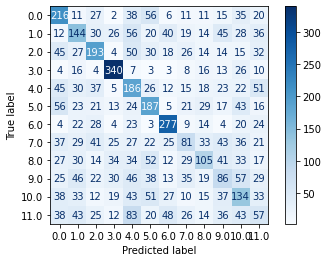

In [142]:
from sklearn.metrics import multilabel_confusion_matrix 
from sklearn.metrics import plot_confusion_matrix

disp = plot_confusion_matrix(clf, X_test, y_test, cmap='Blues', values_format='d')

In [143]:
from sklearn.metrics import classification_report

print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.39      0.48      0.43       448
         1.0       0.32      0.31      0.31       470
         2.0       0.43      0.41      0.42       468
         3.0       0.66      0.76      0.71       450
         4.0       0.30      0.40      0.34       470
         5.0       0.37      0.41      0.39       455
         6.0       0.57      0.64      0.60       432
         7.0       0.28      0.19      0.23       420
         8.0       0.35      0.25      0.29       428
         9.0       0.23      0.19      0.21       446
        10.0       0.27      0.30      0.28       452
        11.0       0.16      0.13      0.14       445

    accuracy                           0.37      5384
   macro avg       0.36      0.37      0.36      5384
weighted avg       0.36      0.37      0.36      5384



Our technique for downsampling didn't worked out very well.

#### TfIdf Weighting
Do the same, using a classifier that averages the word vectors of words in the document, weighting each word by its TfIdf.


In [155]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(stop_words='english',min_df=min_word_count)
X_tfidf = tfidf_vectorizer.fit_transform(clean_train_lyrics_as_scentences)

In [190]:
def get_song_vector_weighted_by_tfidf(song_number, gensim_model, tokenized_song, tfidf, tfidf_vocab):
    song_matrix = np.zeros(shape=(len(tokenized_song), gensim_model.vector_size))
    for idx, word in enumerate(tokenized_song):
        try:
            word_index = tfidf_vocab[word]
            current_word_vector = gensim_model.wv[word]*tfidf[song_number,word_index]
            song_matrix[idx,:] = current_word_vector
        except KeyError:
            pass
    avg_vec = song_matrix.sum(axis=0)/song_matrix.shape[0]
    return avg_vec.reshape(1,gensim_model.vector_size)


In [191]:
sample_num = 50000
clean_train_lyrics_as_words_50k = clean_train_lyrics_as_words[:sample_num]
df_50k = df[:sample_num]

In [192]:
y = []
X = np.zeros(shape=(df_50k.shape[0], model.vector_size))
for i, (row, scentence) in tqdm(enumerate(zip(df_50k.itertuples(), clean_train_lyrics_as_words_50k))):
    tokens = scentence
    song_vector = get_song_vector_weighted_by_tfidf(i, model, tokens, X_tfidf, tfidf_vectorizer.vocabulary_)
    X[i,:] = song_vector
    label = row.genre
    y.append(label)
    
y = np.array(y)

/home/ubuntu/venvs/dl_venv/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


In [193]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X = np.nan_to_num(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

lr_model_word_vectors_and_tfidf = LogisticRegression(verbose=1)
lr_model_word_vectors_and_tfidf.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/home/ubuntu/venvs/dl_venv/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.8s finished


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=1,
                   warm_start=False)

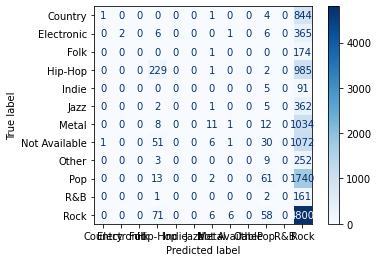

In [194]:
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import plot_confusion_matrix

disp = plot_confusion_matrix(lr_model_word_vectors_and_tfidf, X_test, y_test, cmap='Blues', values_format='d')

In [195]:
from sklearn.metrics import classification_report

print(classification_report(y_test, lr_model_word_vectors_and_tfidf.predict(X_test)))

               precision    recall  f1-score   support

      Country       0.50      0.00      0.00       850
   Electronic       1.00      0.01      0.01       380
         Folk       0.00      0.00      0.00       175
      Hip-Hop       0.60      0.19      0.29      1217
        Indie       0.00      0.00      0.00        96
         Jazz       0.00      0.00      0.00       370
        Metal       0.38      0.01      0.02      1066
Not Available       0.11      0.00      0.00      1161
        Other       0.00      0.00      0.00       264
          Pop       0.31      0.03      0.06      1816
          R&B       0.00      0.00      0.00       164
         Rock       0.40      0.97      0.57      4941

     accuracy                           0.41     12500
    macro avg       0.28      0.10      0.08     12500
 weighted avg       0.37      0.41      0.26     12500



/home/ubuntu/venvs/dl_venv/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Text classification using ConvNet
Do the same, using a ConvNet.  
The ConvNet should get as input a 2D matrix where each column is an embedding vector of a single word, and words are in order. Use zero padding so that all matrices have a similar length.  
Some songs might be very long. Trim them so you keep a maximum of 128 words (after cleaning stop words and rare words).  
Initialize the embedding layer using the word vectors that you've trained before, but allow them to change during training.  

Extra: Try training the ConvNet with 2 slight modifications:
1. freezing the the weights trained using Word2vec (preventing it from updating)
1. random initialization of the embedding layer

You are encouraged to try this question on your own.  

You might prefer to get ideas from the paper "Convolutional Neural Networks for Sentence Classification" (Kim 2014, [link](https://arxiv.org/abs/1408.5882)).

There are several implementations of the paper code in PyTorch online (see for example [this repo](https://github.com/prakashpandey9/Text-Classification-Pytorch) for a PyTorch implementation of CNN and other architectures for text classification). If you get stuck, they might provide you with a reference for your own code.

In [14]:
if ALREADY_TRAINED_WV:
    model = Word2Vec.load(model_name)

In [18]:
max_words = 128
songs_wv_matrix = np.zeros(shape=(vector_size, max_words, df.shape[0]))
wv_matrix = np.zeros(shape=(vector_size, max_words))
for song_lyrics in clean_train_lyrics_as_words:
    for i, word in enumerate(song_lyrics[:max_words]):
        if word in model.wv.vocab:
            wv_matrix[:,i] = model.wv[word]
        else:
            i-=1
    songs_wv_matrix[:,:,-1] =  wv_matrix
    wv_matrix = np.zeros(shape=(vector_size, max_words))
songs_wv_matrix.shape

(300, 128, 266556)

In [116]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision

batch_size=4

class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        # 3 input channels, 6 output channels, 5x5 square convolution
        self.conv1 = nn.Conv2d(1, 1, (5, 5), stride=1)
        self.activation1 = None
        self.conv2 = nn.Conv2d(1, 1, (5,5), stride=1) 
        self.activation2 = None
        self.conv3 = nn.Conv2d(1, 1, (5,5), stride=1)       
        self.activation3 = None
        self.fc1 = nn.Linear(22*8, 12, bias=True) 
        


    def forward(self, x):
        x = torch.unsqueeze(x, dim=1)
        self.activation1 = F.relu(self.conv1(x))
        x = F.max_pool2d(self.activation1, (2, 2))      
        self.activation2 = F.relu(self.conv2(x))
        x = F.max_pool2d(self.activation2, (2,2))       
        self.activation3 = F.relu(self.conv3(x))
        x = F.max_pool2d(self.activation3, (3,3))       
        x = x.view(-1, 22*8)                              
        x = self.fc1(x)                                 
        return torch.softmax(x, dim=1)
net = Net()
print(net)

Net(
  (conv1): Conv2d(1, 1, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(1, 1, kernel_size=(5, 5), stride=(1, 1))
  (conv3): Conv2d(1, 1, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=176, out_features=12, bias=True)
)


In [73]:
encoded_y.shape

(266556,)

In [33]:
test_size=0.2
X_train = songs_wv_matrix[:,:,:int(len(encoded_y)*(1-test_size))]
y_train = encoded_y[:int(len(encoded_y)*(1-test_size))]
X_test = songs_wv_matrix[:,:,int(len(encoded_y)*(1-test_size)):]
y_test = encoded_y[int(len(encoded_y)*(1-test_size)):]

In [86]:
from torch.utils.data import Dataset, DataLoader

## train data
class trainData(Dataset):

    def __init__(self, X_data, y_data):
        self.X_data = X_data
        self.y_data = y_data

    def __getitem__(self, index):
        return self.X_data[:,:,index], self.y_data[index]

    def __len__(self):
        return len(self.X_data[:,:])


## test data    
class testData(Dataset):

    def __init__(self, X_data, y_data):
        self.X_data = X_data
        self.y_data = y_data

    def __getitem__(self, index):
        return self.X_data[:,:,index], self.y_data[index]

    def __len__(self):
        return len(self.X_data[:,:])

X_train = torch.FloatTensor(X_train)
y_train = torch.FloatTensor(y_train)
X_test = torch.FloatTensor(X_test)
y_test = torch.FloatTensor(y_test)

In [36]:
batch_size = 4
train_data = trainData(X_train,  y_train)
test_data = testData(X_test, y_test)
train_loader = DataLoader(dataset=train_data, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_data, batch_size=batch_size, shuffle=True)

In [106]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
ohe_y = ohe.fit_transform(encoded_y.reshape(-1,1))

In [148]:
import torch.optim as optim

max_epochs = 50

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(net.parameters(), lr=0.001, betas=(0.9, 0.999), eps=1e-08, weight_decay=0, amsgrad=False)
running_loss = 0.0


# Train model
for epoch in range(max_epochs):
    for i, (local_X, local_y) in enumerate(train_loader):
        optimizer.zero_grad()   # zero the gradient buffers

        output = net(local_X)
        
        local_y = torch.tensor(local_y, dtype=torch.int32)
        
        loss = criterion(output, local_y.T.long())
        
        loss.backward()
        
        optimizer.step()    # Does the update
        
        running_loss += loss.item()
        if i%1000 == 999:
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 1000))
            running_loss = 0.0

/home/ubuntu/venvs/dl_venv/lib/python3.6/site-packages/ipykernel_launcher.py:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


In [149]:
import torch.optim as optim

max_epochs = 2

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(net.parameters(), lr=0.001, betas=(0.9, 0.999), eps=1e-08, weight_decay=0, amsgrad=False)
running_loss = 0.0

net.eval()

correct = 0
total = 0

# Test model
with torch.no_grad():
    for i, (local_X, local_y) in enumerate(test_loader):
        optimizer.zero_grad()   # zero the gradient buffers

        output = net(local_X)

        local_y = torch.tensor(local_y, dtype=torch.int32)

        _, predicted = torch.max(output.data, 1)
        total += local_y.size(0)
        correct += (predicted == local_y).sum().item()


        running_loss += loss.item()
        if i%1000 == 999:
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 1000))
            running_loss = 0.0
print('Accuracy of the network on test: %d %%' % (100 * correct / total))

/home/ubuntu/venvs/dl_venv/lib/python3.6/site-packages/ipykernel_launcher.py:21: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


Accuracy of the network on test: 5 %
